# Getting started with enjambment analysis 

jane/run.py introduces how the charmak package can be used to create a simple bar chart. This kind of chart is great for simple visualisation (according to one criterion, such as an author).   
<img src="img/charles_buk.png"/>
<center>Example of single bar plot: Distribution of enjambment types in Bukowski's poetry<center>   

When it comes to compartive study of enjambment distribution (between two authors or different poetic forms), being able to compare enjambment distribution in one glance is more practical. It is, however, a different kettle of fish to create such plots.  
This tutorial aims to walk python-literate users through the basics. We'll use Bukowski and Plath's poems, annotated with JaDe. 

First, we need to import a few functions: 
- `show` displays the chart in your browser's window
- `gridplot` is useful to display several charts at a time. It also comes with a toolbar, so you can zoom in a certain part of your chart and save that specific view, among other.
- from `run`, we import get_annotation, which iterates through the files in a given directory and retrieve all annotations JaDe made.

In [1]:
import pathlib
from bokeh.io import show
from bokeh.layouts import gridplot
from run import get_annotation
from charmak.diagrams import multibars_plot

Then we define where the system will find the annotations (ideally, a directory as output when running JaDe).

In [2]:
plath = pathlib.Path('annotated_sylvia_plath').resolve()
bukowski = pathlib.Path('annotated_charles_bukowski').resolve()

We retrieve every annotation made by JaDe for each directory. Because some types may be used by an author and not by an author, we'll build a custom list of enjambment types by removing duplicates and concatenating both lists. We're sorting them as well so that it easier to find a specific type once the chart is built, but more importantly so the values are aligned in our data structure.

In [3]:
plath_annotations = get_annotation(plath)
bukowski_annotations = get_annotation(bukowski)
enjambment_types = sorted(list(set(plath_annotations + bukowski_annotations)))

For now, we cannot use the data we have to build the chart, so we have to get the number of occurrences of each type for each author. Since an author might use _pb_adj_adj_ and the other might not, we initialise our dictionaries with each one of our types in the custom list, and their count is set to 0. We then proceed to update the number of occurrences. 

In [4]:
plath_dict = {enjambment_type: 0 for enjambment_type in enjambment_types}
bukowski_dict = {enjambment_type: 0 for enjambment_type in enjambment_types}

for annotation in plath_annotations: 
    try: 
        plath_dict[annotation] += 1
    except KeyError:
        continue
        
for annotation in bukowski_annotations:
    try:
        bukowski_dict[annotation] += 1
    except KeyError:
        continue
        
comparative_dict = {'enjambment_types': enjambment_types, 
                    'sylvia plath': list(plath_dict.values()), 
                    'charles bukowski': list(bukowski_dict.values())}

print(comparative_dict)

{'enjambment_types': ['[cc_cross_clause]', '[ex_dobj_verb]', '[ex_subj_verb]', '[ex_verb_adjunct]', '[pb_adj_adj]', '[pb_adj_adv]', '[pb_adj_prep, pb_adj_adv]', '[pb_adj_prep]', '[pb_adv_adv]', '[pb_comp]', '[pb_det_noun]', '[pb_noun_adj]', '[pb_noun_noun]', '[pb_noun_prep]', '[pb_phrasal_verb]', '[pb_relword]', '[pb_to_verb]', '[pb_verb_adv]', '[pb_verb_chain]', '[pb_verb_cprep]', '[pb_verb_prep]'], 'sylvia plath': [75, 139, 230, 9, 10, 3, 0, 3, 2, 12, 13, 95, 39, 212, 7, 12, 2, 21, 3, 9, 70], 'charles bukowski': [59, 223, 303, 12, 17, 36, 1, 1, 19, 46, 234, 103, 58, 125, 16, 110, 28, 78, 55, 10, 80]}


Once the data structure is sucessfully put in place, we just need to call `multibars_plot` and pass our arguments. 
- `comparative_dict` is our data structure. It should always include a list of the enjambments types that we want to observe. **Note that the functions in charmak.diagrams are made to work with enjambment types and that it expects the key associated with enjambment types to actually contains the word 'types'.**
- `orientation`controls the orientation of the labels on the x axis. Because we have around 22 labels, it is unpractical to display them horizontally (they overlap), we'll provide a float number so that they are slightly inclined. We could have displayed them vertically as well.
- `width` controls the width of the chart. 750 is a great width to insert the chart in a .odt or .docx file. 
- `y_margin` is used to compute the maximum y value to be displayed on the y axis. If left to None, the maximum y value is equal to the maximum found in the data structure(in our case, it would be 303). 
- `colors` controls the colors to be used in the chart. If None is passed, they are automatically generated according to the number of significant keys (in our case, 2). __This means that they are random and change from one execution to another.__ Bokeh comes with a collections of palettes that can be used to generate a list of colors, such as cividis. For the sake of example, charts for each case (no colors are provided, colors are provided with chosen colors, colors are generated with a Bokeh palette) are provided.

In [15]:
# even if we want to use only 2 colors, we have to provide a list of 3 items
provided_chart = multibars_plot(data=comparative_dict, title='Comparison of enjambment types distribution in Plath\
and Bukowski\'s poetry', orientation=3.14/3, width=1000, y_margin=10, colors=['','#00ccff', '#cc6600'])

no_colors_chart = multibars_plot(data=comparative_dict, title='Comparison of enjambment types distribution in Plath\
and Bukowski\'s poetry', orientation=3.14/3, width=1000, y_margin=10)

from bokeh.palettes import cividis

colors = cividis(len(enjambment_types))
cividis_chart = multibars_plot(data=comparative_dict, title='Comparison of enjambment types distribution in Plath\
and Bukowski\'s poetry', orientation=3.14/3, width=1000, y_margin=10, colors=colors)

The charts are ready to be displayed. We're using gridplot so that we can display all of them at the same time.

In [16]:
grid = gridplot([[provided_chart], [no_colors_chart], [cividis_chart]])
show(grid)

Below are, in order, the charts obtained:
<img src="img/provided_jane.png"/>
<center>Chart obtained when providing a set number of colors<center>

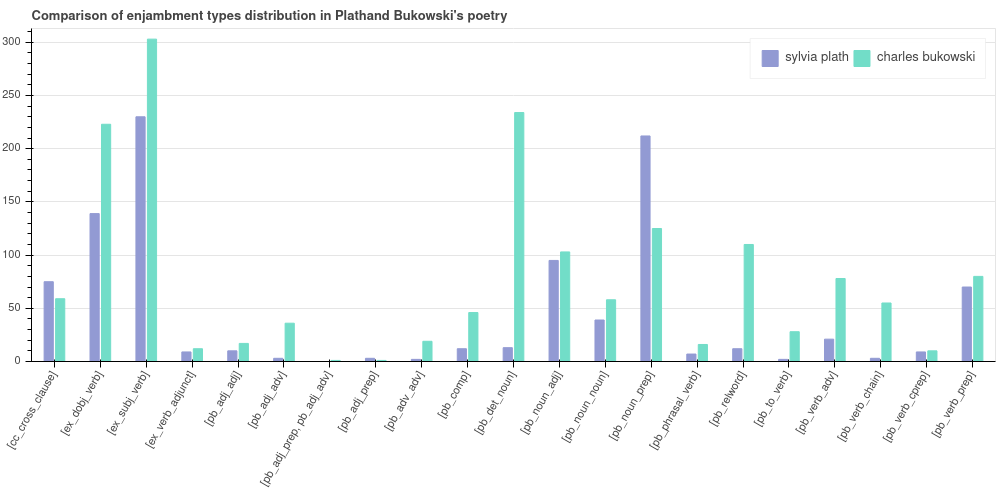
<center>Chart obtained when generating random colors<center>

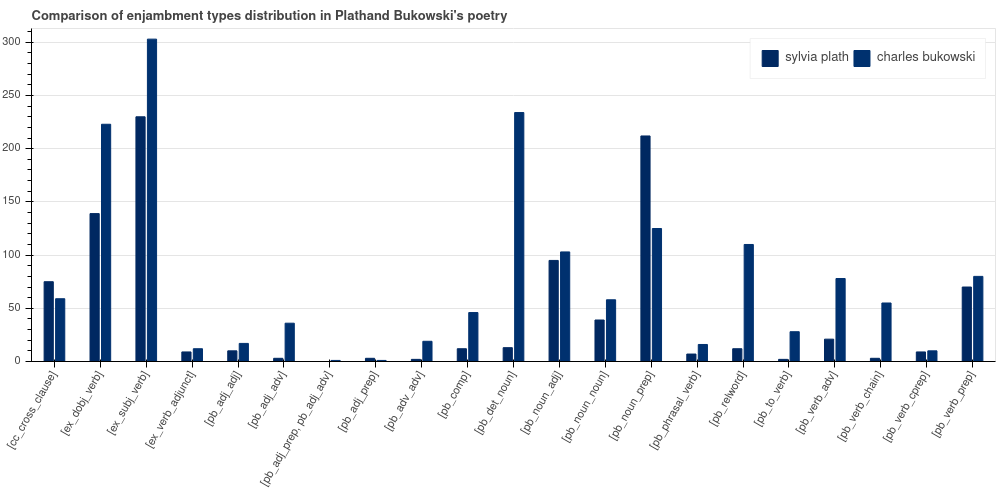
<center>Chart obtained when using a Bokeh palette (cividis) to generate colors<center>

Now, with close to no efforts, we can see enjambment distribution in Plath and Bukowski's poetry and compare them in one glance :)  
The logic is pretty much the same from one criterion to another (poetic form, period, author). Just bear in mind that using multibars plot reaches its limit when comparing more than 3 authors/forms/period, due to the sheer amount of information to be displayed. It can be done though, but the chart won't be as easy to read, since there is no clear separation from one *x* to another.